In [2]:
import tensorflow as tf
import numpy as np
import vgg19
import matplotlib.pyplot as plt
import utils

In [3]:
images = tf.placeholder(tf.float32, [None, 224, 224, 3])

In [4]:
def gram_matrix(F, N, M):
    Ft = tf.reshape(F, (M, N))
    return tf.matmul(tf.transpose(Ft), Ft)

/Users/laurens/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


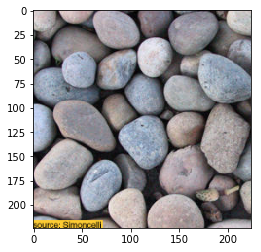

/Users/laurens/in4015/vgg19.npy
npy file loaded
build model started
build model finished: 1s
Tensor("MatMul_10:0", shape=(512, 512), dtype=float32, device=/device:CPU:0)
Tensor("MatMul_11:0", shape=(256, 256), dtype=float32, device=/device:CPU:0)
Tensor("MatMul_12:0", shape=(128, 128), dtype=float32, device=/device:CPU:0)
Tensor("MatMul_13:0", shape=(64, 64), dtype=float32, device=/device:CPU:0)
Tensor("MatMul_14:0", shape=(64, 64), dtype=float32, device=/device:CPU:0)


In [7]:
img_input = utils.load_image("./test_data/pebbles.jpg")

batch = img_input.reshape((1, 224, 224, 3))

plt.imshow(img_input.reshape((224,224,3)))
plt.show()

with tf.device('/cpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder("float", [1, 224, 224, 3])
        feed_dict = {images: batch}

        vgg = vgg19.Vgg19()
        with tf.name_scope("content_vgg"):
            vgg.build(images)
            
        layers = [vgg.pool4, vgg.pool3, vgg.pool2, vgg.pool1, vgg.conv1_1]
        for l,layer in enumerate(layers):
            dimensions = layer.get_shape().as_list()
            a = gram_matrix(layer, dimensions[3], dimensions[2]*dimensions[1])
            print(a)
        
#         prob = sess.run(vgg.prob, feed_dict=feed_dict)
#         print(prob)
#         utils.print_prob(prob[0], './synset.txt')